## Neighbors 1) mayor que el número mínimo de muestras que un clúster debe contener, de modo que otras muestras puedan ser valores atípicos locales en relación con este clúster, y 2) menor que el número máximo de muestras cercanas que podrían ser valores atípicos locales potenciales.
### Es menor que las muestras potenciales de valores atipicos que muestra el digrama de caja
### Por defecto considera el 10% de los datos en la muestra de posibles outliers
### Articulo en medium indica que es una buena practica considerar el Q1 como 0.05 y Q3 como 0.95 para eliminar outliers, ¿es decir el 10 porciento de los datos?. 

In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# basepath = "/home/jonathan/tesis/11avo_avance/trayectoNnormalidad.csv"
# data = pd.read_csv(basepath, dtype={"fecha": str,
#                                     "origen": str,
#                                     "destino": str}, sep=',') 
# data = data[['fecha','origen','destino','periodo','distancia','viajes']]

In [3]:
# data['distancia'].value_counts()
# data['periodo'].value_counts()
# prueba = data.query('viajes < 1.5')
# prueba.head(60)

In [4]:
# df_dist1 = data.loc[data['distancia'] == '002-005'] 
# df_dist2 = data.loc[data['distancia'] == '005-010'] 
# df_dist1 = df_dist1[['periodo','viajes']]
# df_dist2 = df_dist2[['periodo','viajes']]

# normalizamos periodo y viajes

In [5]:
# # Calculo normalizado
# clf = LocalOutlierFactor(n_neighbors=30)
# normalized_df = (df_dist1-df_dist1.mean())/df_dist1.std() # Normalizamos las 2 variables

# clf.fit_predict(normalized_df)    #Calculamos la distancia entre los puntos 
# results = clf.negative_outlier_factor_
# df_dist1['LOF'] = results.tolist()  #Agregamos columna lof

# df_dist1.query('LOF < -1.5') # No hace nada porque no lo guardamos en una variable


# plt.figure(figsize=(12, 6))
# plt.scatter(df_dist1.periodo,df_dist1['viajes'], c='black', s=df_dist1.LOF * -1, label='data points')
# radius = (results.max() - results) / (results.max() - results.min())
# plt.scatter(df_dist1.periodo,df_dist1['viajes'], s=400 * radius, edgecolors ='r', facecolors='none', label='outlier scores')
# legend = plt.legend(loc='upper left')
# legend.legendHandles[0]._sizes = [10]
# legend.legendHandles[1]._sizes = [20]
# plt.show()

In [6]:
# # Calculo normalizado
# clf = LocalOutlierFactor(n_neighbors=30)
# normalized_df = (df_dist2-df_dist2.mean())/df_dist2.std() # Normalizamos las 2 variables

# clf.fit_predict(normalized_df)    #Calculamos la distancia entre los puntos 
# results = clf.negative_outlier_factor_
# df_dist2['LOF'] = results.tolist()  #Agregamos columna lof

# df_dist2.query('LOF < -1.5') # No hace nada porque no lo guardamos en una variable


# plt.figure(figsize=(12, 6))
# plt.scatter(df_dist2.periodo,df_dist2['viajes'], c='black', s=df_dist2.LOF * -1, label='data points')
# radius = (results.max() - results) / (results.max() - results.min())
# plt.scatter(df_dist2.periodo,df_dist2['viajes'], s=400 * radius, edgecolors ='r', facecolors='none', label='outlier scores')
# legend = plt.legend(loc='upper left')
# legend.legendHandles[0]._sizes = [10]
# legend.legendHandles[1]._sizes = [20]
# plt.show()

# Seleccionamos datos de acuerdo a las estapas de la pandemia

In [7]:
basepath = "/home/jonathan/tesis/11avo_avance/trayectoFeb_Jul.csv"
data = pd.read_csv(basepath, dtype={"fecha": str,
                                    "origen": str,
                                    "destino": str}, sep=',') 
data = data[['fecha','origen','destino','periodo','distancia','viajes']]

data.shape

(43261, 6)

In [8]:
###################Periodo de Referencia######################
df_ref = data[data['fecha'].isin(['20200214','20200215','20200216','20200217','20200218','20200219','20200220',
                                  '20200221','20200222','20200223','20200224','20200225','20200226','20200227',
                                  '20200228','20200229','20200301','20200302','20200303','20200304','20200305',
                                  '20200306','20200307','20200308','20200309','20200310','20200311','20200312',
                                  '20200313','20200314','20200315'])]
print(df_ref.shape)

df_ref_dist1 = df_ref.loc[df_ref['distancia'] == '002-005'] 
df_ref_dist2 = df_ref.loc[df_ref['distancia'] == '005-010'] 
# df_ref_dist1 = df_ref_dist1[['periodo','viajes']]
# df_ref_dist2 = df_ref_dist2[['periodo','viajes']]

df_ref_dist1 = df_ref_dist1.set_index('periodo')
df_ref_dist2 = df_ref_dist2.set_index('periodo')

print(df_ref_dist1.shape)
print(df_ref_dist2.shape)

###################Periodo de Confinamiento######################
df_Conf = data[data['fecha'].isin(['20200316','20200317','20200318','20200319','20200320','20200321','20200322',
                                   '20200323','20200324','20200325','20200326','20200327','20200328','20200329',
                                   '20200330','20200331','20200401','20200402','20200403','20200404','20200405',
                                   '20200406','20200407','20200408','20200409','20200410','20200411','20200412',
                                   '20200413','20200414','20200415','20200416','20200417','20200418','20200419',
                                   '20200420','20200421','20200422','20200423','20200424','20200425','20200426',
                                   '20200427','20200428','20200429','20200430','20200501','20200502'])]
print(df_Conf.shape)

df_Conf_dist1 = df_Conf.loc[df_Conf['distancia'] == '002-005'] 
df_Conf_dist2 = df_Conf.loc[df_Conf['distancia'] == '005-010'] 

df_Conf_dist1 = df_Conf_dist1.set_index('periodo')
df_Conf_dist2 = df_Conf_dist2.set_index('periodo')

print(df_Conf_dist1.shape)
print(df_Conf_dist2.shape)

###################Periodo de Desescalada######################
df_Des = data[data['fecha'].isin(['20200503','20200504','20200505','20200506','20200507','20200508','20200509',
                                  '20200510','20200511','20200512','20200513','20200514','20200515','20200516',
                                  '20200517','20200518','20200519','20200520','20200521','20200522','20200523',
                                  '20200524','20200525','20200526','20200527','20200528','20200529','20200530',
                                  '20200531','20200601','20200602','20200603','20200604','20200605','20200606',
                                  '20200607','20200608','20200609','20200610','20200611','20200612','20200613',
                                  '20200614','20200615','20200616','20200617','20200618','20200619','20200620',
                                  '20200621'])]
print(df_Des.shape)

df_Des_dist1 = df_Des.loc[df_Des['distancia'] == '002-005'] 
df_Des_dist2 = df_Des.loc[df_Des['distancia'] == '005-010'] 

df_Des_dist1 = df_Des_dist1.set_index('periodo')
df_Des_dist2 = df_Des_dist2.set_index('periodo')

print(df_Des_dist1.shape)
print(df_Des_dist2.shape)

###################Periodo de Nnormalidad######################
df_Nnor = data[data['fecha'].isin(['20200622','20200623','20200624','20200625','20200626','20200627','20200628',
                                  '20200629','20200630','20200701','20200702','20200703','20200704','20200705',
                                  '20200706','20200707','20200708','20200709','20200710','20200711','20200712',
                                  '20200713','20200714','20200715','20200716','20200717','20200718','20200719',
                                  '20200720','20200721','20200722','20200723','20200724','20200725','20200726',
                                  '20200727','20200728','20200729','20200730','20200731'])]
print(df_Nnor.shape)

df_Nnor_dist1 = df_Nnor.loc[df_Nnor['distancia'] == '002-005'] 
df_Nnor_dist2 = df_Nnor.loc[df_Nnor['distancia'] == '005-010'] 

df_Nnor_dist1 = df_Nnor_dist1.set_index('periodo')
df_Nnor_dist2 = df_Nnor_dist2.set_index('periodo')

print(df_Nnor_dist1.shape)
print(df_Nnor_dist2.shape)


(14489, 6)
(8645, 5)
(5844, 5)
(6250, 6)
(3622, 5)
(2628, 5)
(10764, 6)
(6069, 5)
(4695, 5)
(11758, 6)
(6718, 5)
(5040, 5)


# Gráfica - Distancia 1 - Referencia

(8645, 5)


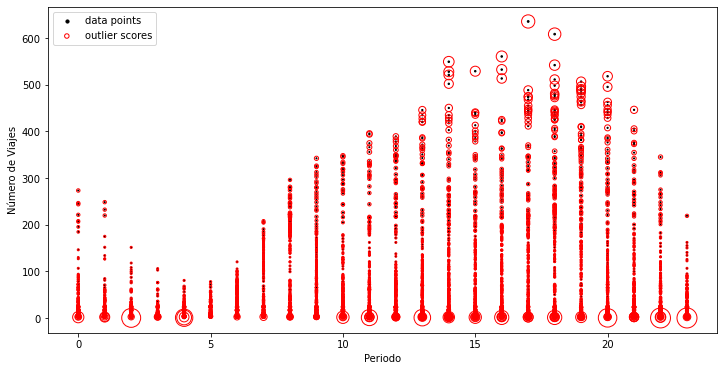

In [9]:
# Calculo normalizado
print(df_ref_dist1.shape)
clf = LocalOutlierFactor(n_neighbors=300)

mean_viajes = df_ref_dist1['viajes'].mean()
std_viajes = df_ref_dist1['viajes'].std()
df_ref_dist1['viajes_normalizado'] = (df_ref_dist1['viajes'] - mean_viajes) / std_viajes
normalized_df = df_ref_dist1[['viajes_normalizado']]
# normalized_df = (df_ref_dist1-df_ref_dist1.mean())/df_ref_dist1.std() # Se hace resta del valor y la media de la columna para después dividir por la desviación estandar

clf.fit_predict(normalized_df)    #Calculamos la distancia entre los puntos 
results = clf.negative_outlier_factor_ #Cuanto menor sea el negative_outlier_factor_, más probable es que el punto sea un valor atípico
df_ref_dist1['LOF'] = results.tolist()  #Agregamos columna lof

df_ref_dist1.query('LOF < -1.5') # No hace nada porque no lo guardamos en una variable


plt.figure(figsize=(12, 6))
plt.scatter(df_ref_dist1.index,df_ref_dist1['viajes'], c='black', s=df_ref_dist1.LOF * -1, label='data points')
radius = (results.max() - results) / (results.max() - results.min())
plt.scatter(df_ref_dist1.index,df_ref_dist1['viajes'], s=400 * radius, edgecolors ='r', facecolors='none', label='outlier scores')
plt.xlabel('Periodo')  
plt.ylabel('Número de Viajes') 
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

# Gráfica - Distancia 2 - Referencia

(5844, 5)


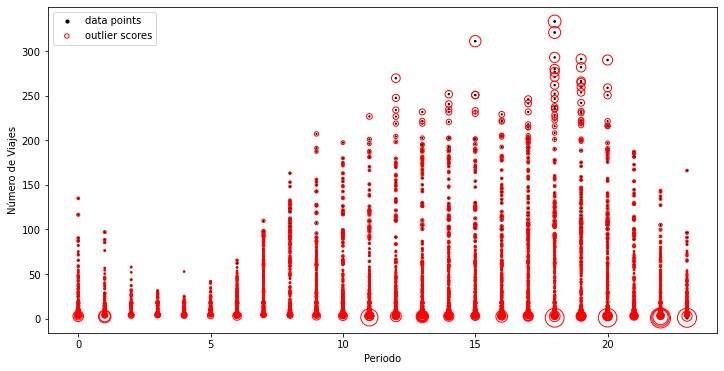

In [10]:
# Calculo normalizado
print(df_ref_dist2.shape)
clf = LocalOutlierFactor(n_neighbors=200)

mean_viajes = df_ref_dist2['viajes'].mean()
std_viajes = df_ref_dist2['viajes'].std()
df_ref_dist2['viajes_normalizado'] = (df_ref_dist2['viajes'] - mean_viajes) / std_viajes
normalized_df = df_ref_dist2[['viajes_normalizado']]
# normalized_df = (df_ref_dist2-df_ref_dist2.mean())/df_ref_dist2.std() # Se hace resta del valor y la media de la columna para después dividir por la desviación estandar

clf.fit_predict(normalized_df)    #Calculamos la distancia entre los puntos 
results = clf.negative_outlier_factor_  #Cuanto menor sea el negative_outlier_factor_, más probable es que el punto sea un valor atípico
df_ref_dist2['LOF'] = results.tolist()  #Agregamos columna lof

df_ref_dist2.query('LOF < -1.5') # No hace nada porque no lo guardamos en una variable


plt.figure(figsize=(12, 6))
plt.scatter(df_ref_dist2.index,df_ref_dist2['viajes'], c='black', s=df_ref_dist2.LOF * -1, label='data points')
radius = (results.max() - results) / (results.max() - results.min())
plt.scatter(df_ref_dist2.index,df_ref_dist2['viajes'], s=400 * radius, edgecolors ='r', facecolors='none', label='outlier scores')
plt.xlabel('Periodo')  
plt.ylabel('Número de Viajes') 
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

# Gráfica - Distancia 1 - Confinamiento

(3622, 5)


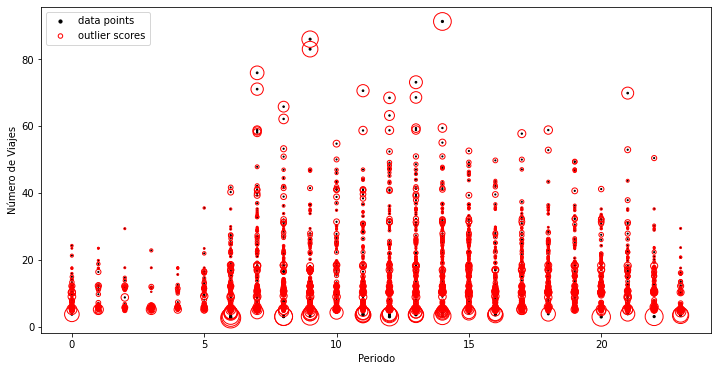

In [11]:
# Calculo normalizado
print(df_Conf_dist1.shape)
clf = LocalOutlierFactor(n_neighbors=80)

mean_viajes = df_Conf_dist1['viajes'].mean()
std_viajes = df_Conf_dist1['viajes'].std()
df_Conf_dist1['viajes_normalizado'] = (df_Conf_dist1['viajes'] - mean_viajes) / std_viajes
normalized_df = df_Conf_dist1[['viajes_normalizado']]
# normalized_df = (df_ref_dist1-df_ref_dist1.mean())/df_ref_dist1.std() # Se hace resta del valor y la media de la columna para después dividir por la desviación estandar

clf.fit_predict(normalized_df)    #Calculamos la distancia entre los puntos 
results = clf.negative_outlier_factor_ #Cuanto menor sea el negative_outlier_factor_, más probable es que el punto sea un valor atípico
df_Conf_dist1['LOF'] = results.tolist()  #Agregamos columna lof

df_Conf_dist1.query('LOF < -1.5') # No hace nada porque no lo guardamos en una variable


plt.figure(figsize=(12, 6))
plt.scatter(df_Conf_dist1.index,df_Conf_dist1['viajes'], c='black', s=df_Conf_dist1.LOF * -1, label='data points')
radius = (results.max() - results) / (results.max() - results.min())
plt.scatter(df_Conf_dist1.index,df_Conf_dist1['viajes'], s=400 * radius, edgecolors ='r', facecolors='none', label='outlier scores')
plt.xlabel('Periodo')  
plt.ylabel('Número de Viajes') 
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

# Gráfica - Distancia 2 - Confinamiento

(2628, 5)


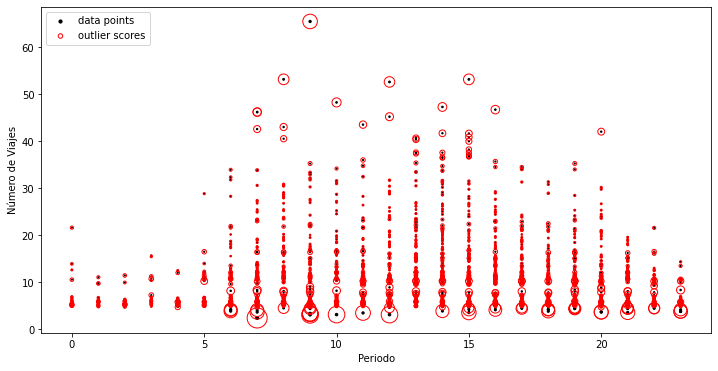

In [12]:
# Calculo normalizado
print(df_Conf_dist2.shape)
clf = LocalOutlierFactor(n_neighbors=58)

mean_viajes = df_Conf_dist2['viajes'].mean()
std_viajes = df_Conf_dist2['viajes'].std()
df_Conf_dist2['viajes_normalizado'] = (df_Conf_dist2['viajes'] - mean_viajes) / std_viajes
normalized_df = df_Conf_dist2[['viajes_normalizado']]
# normalized_df = (df_ref_dist2-df_ref_dist2.mean())/df_ref_dist2.std() # Se hace resta del valor y la media de la columna para después dividir por la desviación estandar

clf.fit_predict(normalized_df)    #Calculamos la distancia entre los puntos 
results = clf.negative_outlier_factor_  #Cuanto menor sea el negative_outlier_factor_, más probable es que el punto sea un valor atípico
df_Conf_dist2['LOF'] = results.tolist()  #Agregamos columna lof

df_Conf_dist2.query('LOF < -1.5') # No hace nada porque no lo guardamos en una variable


plt.figure(figsize=(12, 6))
plt.scatter(df_Conf_dist2.index,df_Conf_dist2['viajes'], c='black', s=df_Conf_dist2.LOF * -1, label='data points')
radius = (results.max() - results) / (results.max() - results.min())
plt.scatter(df_Conf_dist2.index,df_Conf_dist2['viajes'], s=400 * radius, edgecolors ='r', facecolors='none', label='outlier scores')
plt.xlabel('Periodo')  
plt.ylabel('Número de Viajes') 
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

# Gráfica - Distancia 1 - Desescalada

(6069, 5)


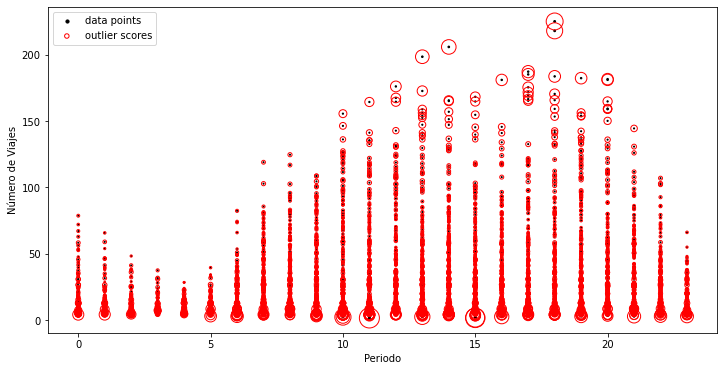

In [13]:
# Calculo normalizado
print(df_Des_dist1.shape)
clf = LocalOutlierFactor(n_neighbors=130) #100

mean_viajes = df_Des_dist1['viajes'].mean()
std_viajes = df_Des_dist1['viajes'].std()
df_Des_dist1['viajes_normalizado'] = (df_Des_dist1['viajes'] - mean_viajes) / std_viajes
normalized_df = df_Des_dist1[['viajes_normalizado']]
# normalized_df = (df_ref_dist1-df_ref_dist1.mean())/df_ref_dist1.std() # Se hace resta del valor y la media de la columna para después dividir por la desviación estandar

clf.fit_predict(normalized_df)    #Calculamos la distancia entre los puntos 
results = clf.negative_outlier_factor_ #Cuanto menor sea el negative_outlier_factor_, más probable es que el punto sea un valor atípico
df_Des_dist1['LOF'] = results.tolist()  #Agregamos columna lof

df_Des_dist1.query('LOF < -1.5') # No hace nada porque no lo guardamos en una variable


plt.figure(figsize=(12, 6))
plt.scatter(df_Des_dist1.index,df_Des_dist1['viajes'], c='black', s=df_Des_dist1.LOF * -1, label='data points')
radius = (results.max() - results) / (results.max() - results.min())
plt.scatter(df_Des_dist1.index,df_Des_dist1['viajes'], s=400 * radius, edgecolors ='r', facecolors='none', label='outlier scores')
plt.xlabel('Periodo')  
plt.ylabel('Número de Viajes') 
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

# Gráfica - Distancia 2 - Desescalada

(4695, 5)


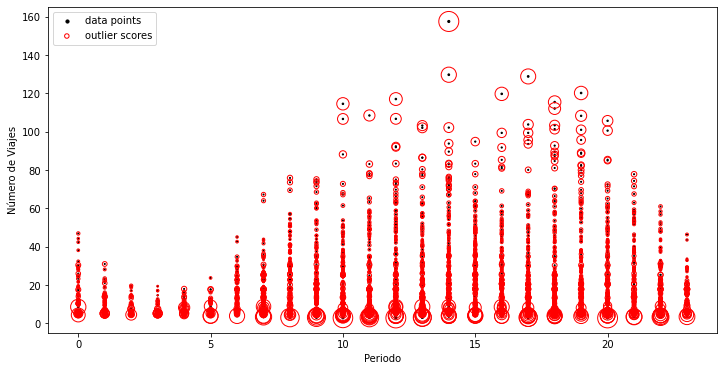

In [14]:
# Calculo normalizado
print(df_Des_dist2.shape)
clf = LocalOutlierFactor(n_neighbors=100)

mean_viajes = df_Des_dist2['viajes'].mean()
std_viajes = df_Des_dist2['viajes'].std()
df_Des_dist2['viajes_normalizado'] = (df_Des_dist2['viajes'] - mean_viajes) / std_viajes
normalized_df = df_Des_dist2[['viajes_normalizado']]
# normalized_df = (df_ref_dist2-df_ref_dist2.mean())/df_ref_dist2.std() # Se hace resta del valor y la media de la columna para después dividir por la desviación estandar

clf.fit_predict(normalized_df)    #Calculamos la distancia entre los puntos 
results = clf.negative_outlier_factor_  #Cuanto menor sea el negative_outlier_factor_, más probable es que el punto sea un valor atípico
df_Des_dist2['LOF'] = results.tolist()  #Agregamos columna lof

df_Des_dist2.query('LOF < -1.5') # No hace nada porque no lo guardamos en una variable


plt.figure(figsize=(12, 6))
plt.scatter(df_Des_dist2.index,df_Des_dist2['viajes'], c='black', s=df_Des_dist2.LOF * -1, label='data points')
radius = (results.max() - results) / (results.max() - results.min())
plt.scatter(df_Des_dist2.index,df_Des_dist2['viajes'], s=400 * radius, edgecolors ='r', facecolors='none', label='outlier scores')
plt.xlabel('Periodo')  
plt.ylabel('Número de Viajes') 
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

# Gráfica - Distancia 1 - Nnormalidad

(6718, 5)


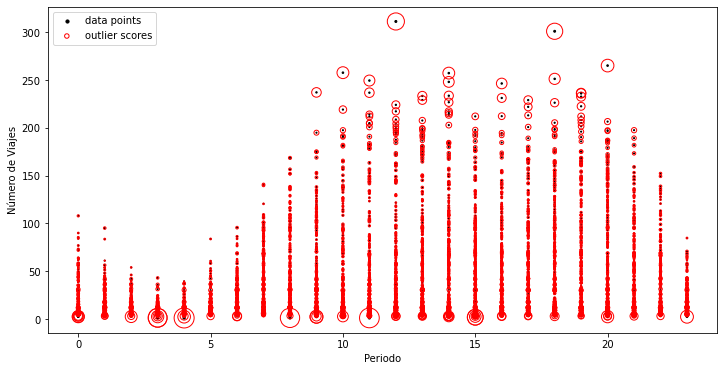

In [15]:
# Calculo normalizado
print(df_Nnor_dist1.shape)
clf = LocalOutlierFactor(n_neighbors=143)#300

mean_viajes = df_Nnor_dist1['viajes'].mean()
std_viajes = df_Nnor_dist1['viajes'].std()
df_Nnor_dist1['viajes_normalizado'] = (df_Nnor_dist1['viajes'] - mean_viajes) / std_viajes
normalized_df = df_Nnor_dist1[['viajes_normalizado']]
# normalized_df = (df_ref_dist1-df_ref_dist1.mean())/df_ref_dist1.std() # Se hace resta del valor y la media de la columna para después dividir por la desviación estandar

clf.fit_predict(normalized_df)    #Calculamos la distancia entre los puntos 
results = clf.negative_outlier_factor_ #Cuanto menor sea el negative_outlier_factor_, más probable es que el punto sea un valor atípico
df_Nnor_dist1['LOF'] = results.tolist()  #Agregamos columna lof

df_Nnor_dist1.query('LOF < -1.5') # No hace nada porque no lo guardamos en una variable


plt.figure(figsize=(12, 6))
plt.scatter(df_Nnor_dist1.index,df_Nnor_dist1['viajes'], c='black', s=df_Nnor_dist1.LOF * -1, label='data points')
radius = (results.max() - results) / (results.max() - results.min())
plt.scatter(df_Nnor_dist1.index,df_Nnor_dist1['viajes'], s=400 * radius, edgecolors ='r', facecolors='none', label='outlier scores')
plt.xlabel('Periodo')  
plt.ylabel('Número de Viajes') 
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

# Gráfica - Distancia 2 - Nnormalidad

(5040, 5)


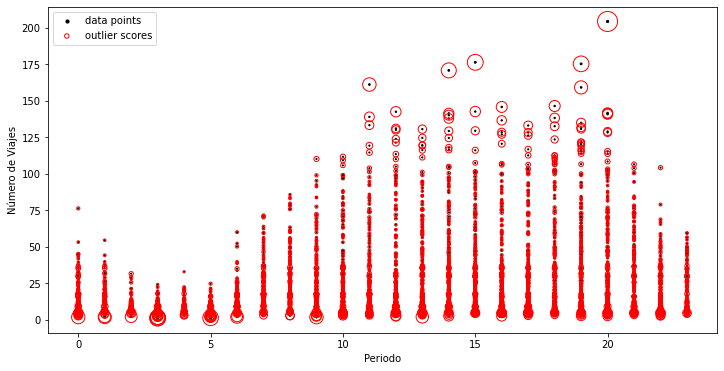

In [16]:
# Calculo normalizado
print(df_Nnor_dist2.shape)
clf = LocalOutlierFactor(n_neighbors=107) #100

mean_viajes = df_Nnor_dist2['viajes'].mean()
std_viajes = df_Nnor_dist2['viajes'].std()
df_Nnor_dist2['viajes_normalizado'] = (df_Nnor_dist2['viajes'] - mean_viajes) / std_viajes
normalized_df = df_Nnor_dist2[['viajes_normalizado']]
# normalized_df = (df_ref_dist2-df_ref_dist2.mean())/df_ref_dist2.std() # Se hace resta del valor y la media de la columna para después dividir por la desviación estandar

clf.fit_predict(normalized_df)    #Calculamos la distancia entre los puntos 
results = clf.negative_outlier_factor_  #Cuanto menor sea el negative_outlier_factor_, más probable es que el punto sea un valor atípico
df_Nnor_dist2['LOF'] = results.tolist()  #Agregamos columna lof

df_Nnor_dist2.query('LOF < -1.5') # No hace nada porque no lo guardamos en una variable


plt.figure(figsize=(12, 6))
plt.scatter(df_Nnor_dist2.index,df_Nnor_dist2['viajes'], c='black', s=df_Nnor_dist2.LOF * -1, label='data points')
radius = (results.max() - results) / (results.max() - results.min())
plt.scatter(df_Nnor_dist2.index,df_Nnor_dist2['viajes'], s=400 * radius, edgecolors ='r', facecolors='none', label='outlier scores')
plt.xlabel('Periodo')  
plt.ylabel('Número de Viajes') 
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

# Diagrama de bloques

In [17]:
# basepath = "/home/jonathan/tesis/11avo_avance/trayectoFeb_Jul.csv"
# data = pd.read_csv(basepath, dtype={"fecha": str,
#                                     "origen": str,
#                                     "destino": str}, sep=',') 
# data = data[['fecha','origen','destino','periodo','distancia','viajes']]

# df_dist1 = data.loc[data['distancia'] == '002-005'] 
# df_dist2 = data.loc[data['distancia'] == '005-010'] 
# df_dist1 = df_dist1[['periodo','viajes']]
# df_dist2 = df_dist2[['periodo','viajes']]

# df_dist1 = df_dist1.set_index('periodo')
# df_dist2 = df_dist2.set_index('periodo')

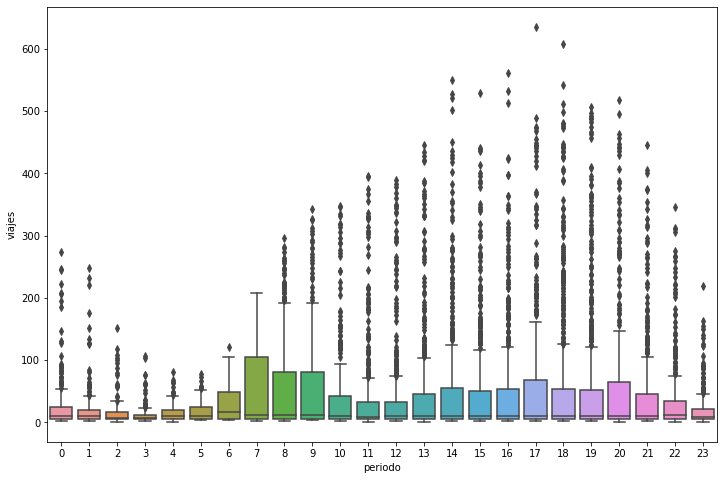

In [18]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df_ref_dist1.index,y='viajes',data=df_ref_dist1)
plt.show()

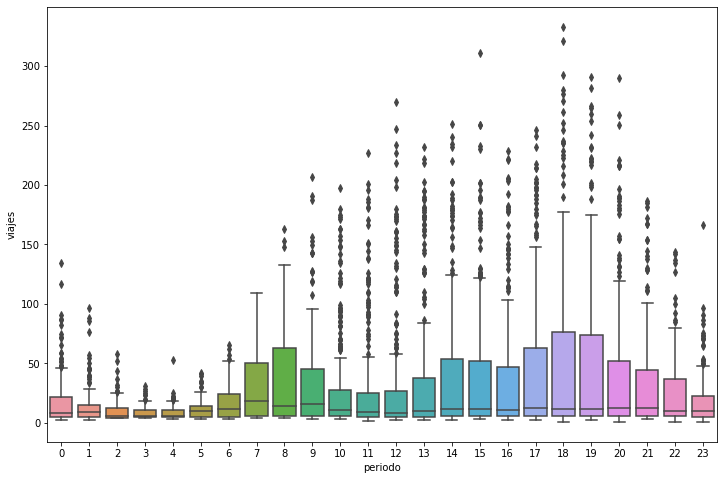

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df_ref_dist2.index,y='viajes',data=df_ref_dist2)
plt.show()

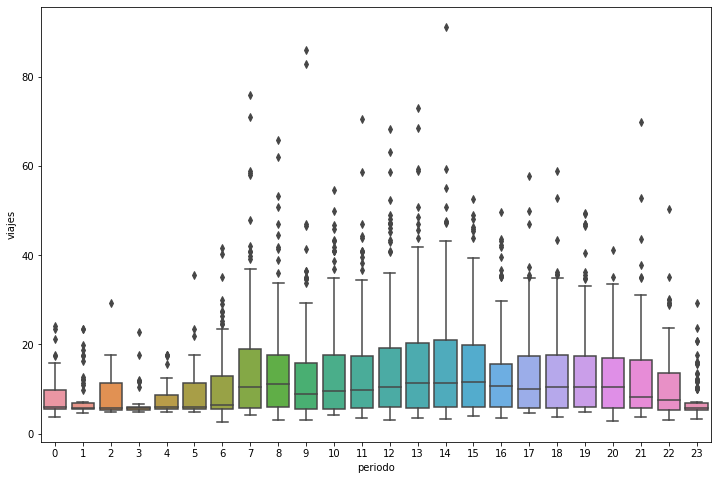

In [20]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df_Conf_dist1.index,y='viajes',data=df_Conf_dist1)
plt.show()

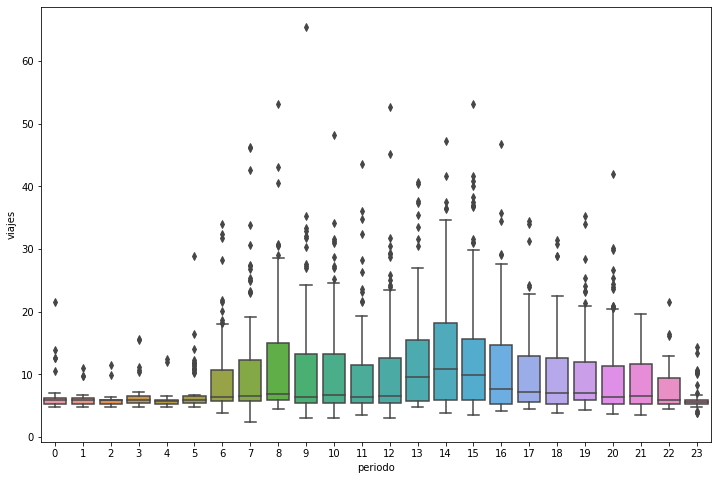

In [21]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df_Conf_dist2.index,y='viajes',data=df_Conf_dist2)
plt.show()

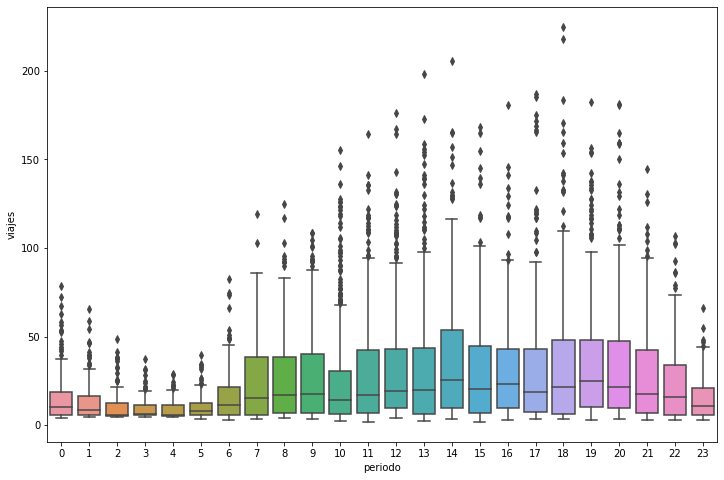

In [22]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df_Des_dist1.index,y='viajes',data=df_Des_dist1)
plt.show()

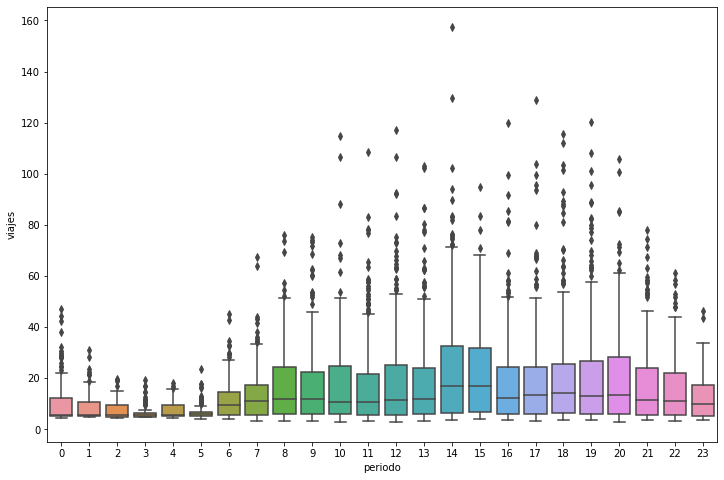

In [23]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df_Des_dist2.index,y='viajes',data=df_Des_dist2)
plt.show()

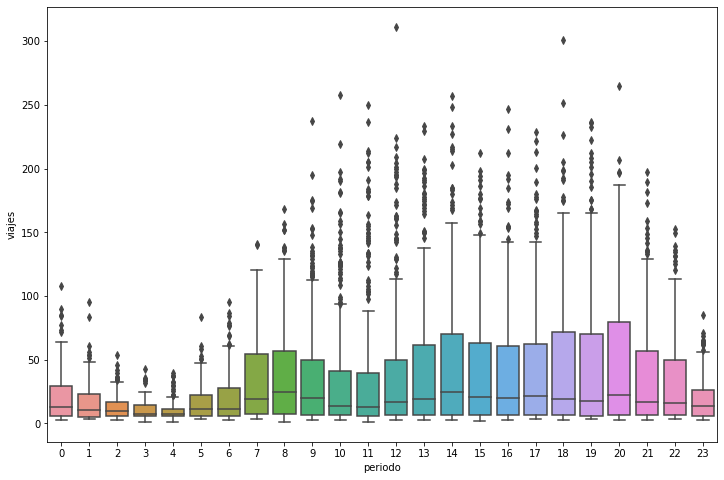

In [24]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df_Nnor_dist1.index,y='viajes',data=df_Nnor_dist1)
plt.show()

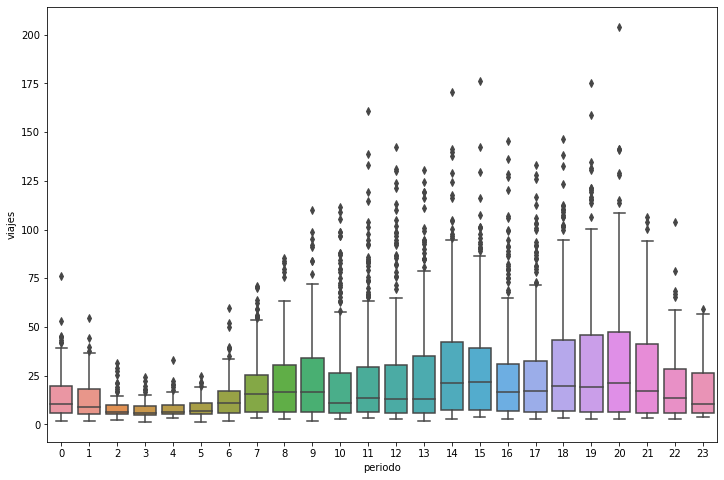

In [25]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df_Nnor_dist2.index,y='viajes',data=df_Nnor_dist2)
plt.show()

# Revisamos datos atípicos 

In [26]:
Q1 = df_ref_dist1['viajes'].quantile(0.25)
Q3 = df_ref_dist1['viajes'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df_ref_dist1[(df_ref_dist1['viajes'] < lower_bound) | (df_ref_dist1['viajes'] > upper_bound)]

# 'outliers' ahora contiene los registros con valores atípicos en la columna especificada
print("Registros con valores atípicos:")
print(outliers)

Registros con valores atípicos:
            fecha   origen  destino distancia   viajes  viajes_normalizado  \
periodo                                                                      
6        20200214  2807905  2807901   002-005   99.756            0.685381   
7        20200214  2807905  2807901   002-005  166.261            1.512142   
8        20200214  2807905  2807901   002-005  190.012            1.807404   
9        20200214  2807905  2807901   002-005  185.261            1.748342   
10       20200214  2807905  2807901   002-005  156.758            1.394005   
...           ...      ...      ...       ...      ...                 ...   
15       20200313  2807905  2807901   002-005  152.201            1.337354   
16       20200313  2807905  2807901   002-005  135.129            1.125123   
17       20200313  2807905  2807901   002-005   92.062            0.589733   
18       20200313  2807905  2807901   002-005   88.037            0.539696   
14       20200313  2807905  2807

In [27]:
df_ref_dist1

,fecha,origen,destino,distancia,viajes,viajes_normalizado,LOF
periodo,,,,,,,
0,20200214,2807905,2807901,002-005,23.751,-0.259480,-1.114743
1,20200214,2807905,2807901,002-005,19.001,-0.318530,-1.006798
2,20200214,2807905,2807901,002-005,4.750,-0.495692,-1.030905
3,20200214,2807905,2807901,002-005,28.500,-0.200442,-1.019661
4,20200214,2807905,2807901,002-005,23.750,-0.259492,-1.114674
...,...,...,...,...,...,...,...
13,20200315,2807905,2807901,002-005,5.538,-0.485896,-0.985621
15,20200315,2807905,2807901,002-005,5.746,-0.483310,-1.015485
18,20200315,2807905,2807901,002-005,6.013,-0.479991,-1.010970


In [28]:
outliers = df_ref_dist1.query('LOF < -2') # No hace nada porque no lo guardamos en una variable
outliers.shape

(42, 7)

In [29]:
outliers = df_ref_dist2.query('LOF < -2') # No hace nada porque no lo guardamos en una variable
outliers.shape

(39, 7)

In [30]:
outliers = df_Conf_dist1.query('LOF < -2') # No hace nada porque no lo guardamos en una variable
outliers.shape

(80, 7)

In [31]:
outliers = df_Conf_dist2.query('LOF < -2') # No hace nada porque no lo guardamos en una variable
outliers.shape

(72, 7)

In [32]:
outliers = df_Des_dist1.query('LOF < -2') # No hace nada porque no lo guardamos en una variable
outliers.shape

(49, 7)

In [33]:
outliers = df_Des_dist2.query('LOF < -2') # No hace nada porque no lo guardamos en una variable
outliers.shape

(105, 7)

In [34]:
outliers = df_Nnor_dist1.query('LOF < -2') # No hace nada porque no lo guardamos en una variable
outliers.shape

(28, 7)

In [35]:
outliers = df_Nnor_dist2.query('LOF < -2') # No hace nada porque no lo guardamos en una variable
outliers.shape

(26, 7)

# Eliminamos datos atípicos

In [36]:
umbral_lof = 1.5
df_ref_dist1 = df_ref_dist1.query('LOF > -2')
print(df_ref_dist1.shape)
df_ref_dist2 = df_ref_dist2.query('LOF > -2')
print(df_ref_dist2.shape)
df_Conf_dist1 = df_Conf_dist1.query('LOF > -2')
print(df_Conf_dist1.shape)
df_Conf_dist2 = df_Conf_dist2.query('LOF > -2')
print(df_Conf_dist2.shape)
df_Des_dist1 = df_Des_dist1.query('LOF > -2')
print(df_Des_dist1.shape)
df_Des_dist2 = df_Des_dist2.query('LOF > -2')
print(df_Des_dist2.shape)
df_Nnor_dist1 = df_Nnor_dist1.query('LOF > -2')
print(df_Nnor_dist1.shape)
df_Nnor_dist2 = df_Nnor_dist2.query('LOF > -2')
print(df_Nnor_dist2.shape)

(8603, 7)
(5805, 7)
(3542, 7)
(2556, 7)
(6020, 7)
(4590, 7)
(6690, 7)
(5014, 7)


# Dataset Limpio outliers

In [37]:
trayectoFeb_Jul_NOoutliers = pd.concat([df_ref_dist1, df_ref_dist2, df_Conf_dist1, df_Conf_dist2, df_Des_dist1, df_Des_dist2, df_Nnor_dist1, df_Nnor_dist2])
print(trayectoFeb_Jul_NOoutliers.head())
print(trayectoFeb_Jul_NOoutliers.shape) #registros resultantes 42073

            fecha   origen  destino distancia  viajes  viajes_normalizado  \
periodo                                                                     
0        20200214  2807905  2807901   002-005  23.751           -0.259480   
1        20200214  2807905  2807901   002-005  19.001           -0.318530   
2        20200214  2807905  2807901   002-005   4.750           -0.495692   
3        20200214  2807905  2807901   002-005  28.500           -0.200442   
4        20200214  2807905  2807901   002-005  23.750           -0.259492   

              LOF  
periodo            
0       -1.114743  
1       -1.006798  
2       -1.030905  
3       -1.019661  
4       -1.114674  
(42820, 7)


In [38]:
trayectoFeb_Jul_NOoutliers = trayectoFeb_Jul_NOoutliers[['fecha','origen','destino','distancia','viajes']]
trayectoFeb_Jul_NOoutliers = trayectoFeb_Jul_NOoutliers.reset_index()

In [39]:
print(trayectoFeb_Jul_NOoutliers.head())
print(trayectoFeb_Jul_NOoutliers.shape)

   periodo     fecha   origen  destino distancia  viajes
0        0  20200214  2807905  2807901   002-005  23.751
1        1  20200214  2807905  2807901   002-005  19.001
2        2  20200214  2807905  2807901   002-005   4.750
3        3  20200214  2807905  2807901   002-005  28.500
4        4  20200214  2807905  2807901   002-005  23.750
(42820, 6)


In [41]:
trayectoFeb_Jul_NOoutliers.to_csv('trayectoFeb_Jul_NOoutliers.csv', index=False)